In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
plt.style.use('seaborn')

In [2]:
df = pd.read_excel('Sample - Superstore.xls')
df.shape

(9994, 21)

In [3]:
df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820


In [4]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [5]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

### Region wise Sales

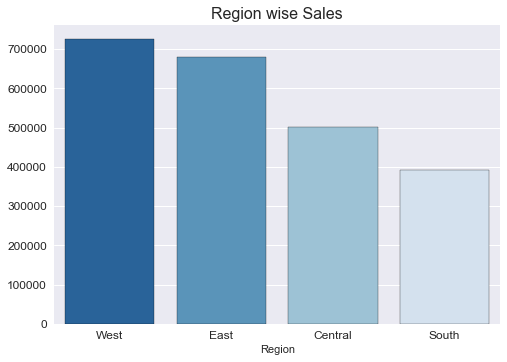

In [93]:
# Region wise Sales
#-------------------------------------------------------------------------------------------
region_group = df.groupby('Region').sum('Sales').sort_values('Sales',ascending=False)
#-------------------------------------------------------------------------------------------
fig = plt.figure("Region wise Sales")
#-------------------------------------------------------------------------------------------
sns.barplot(x = region_group['Sales'].index, 
            y = region_group['Sales'].values, 
            edgecolor='black',
            palette ='Blues_r', ci = None)
#-------------------------------------------------------------------------------------------
plt.title('Region wise Sales',fontsize=16)
plt.xticks( fontsize=12)
plt.yticks( fontsize=12)
#-------------------------------------------------------------------------------------------
plt.show()

In [8]:
df.Country.value_counts()

United States    9994
Name: Country, dtype: int64

### Top 10 State wise Sales

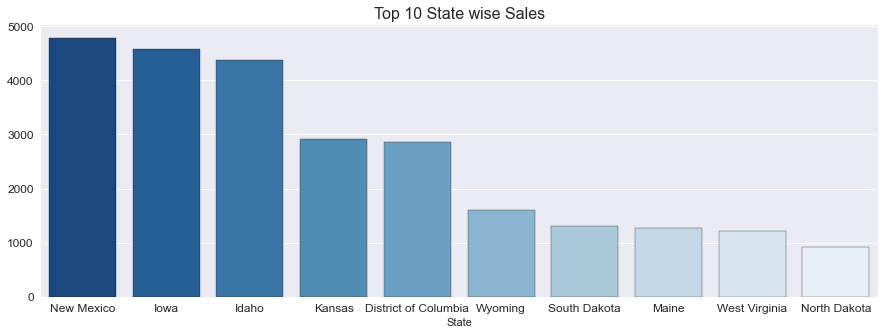

In [83]:
# Top 10 State wise Sales
#-------------------------------------------------------------------------------------------
state_group = df.groupby('State').sum('Sales').sort_values('Sales',ascending=False)
#-------------------------------------------------------------------------------------------
fig = plt.figure("Top 10 State wise Sales",figsize=(15,5))
#-------------------------------------------------------------------------------------------
sns.barplot(x = state_group['Sales'].index[-10:], 
            y = state_group['Sales'].values[-10:], 
            edgecolor='black',
            palette ='Blues_r', ci = None)
#-------------------------------------------------------------------------------------------
plt.title('Top 10 State wise Sales',fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
#-------------------------------------------------------------------------------------------
plt.show()

### Top 20 City wise Sales (Millions)

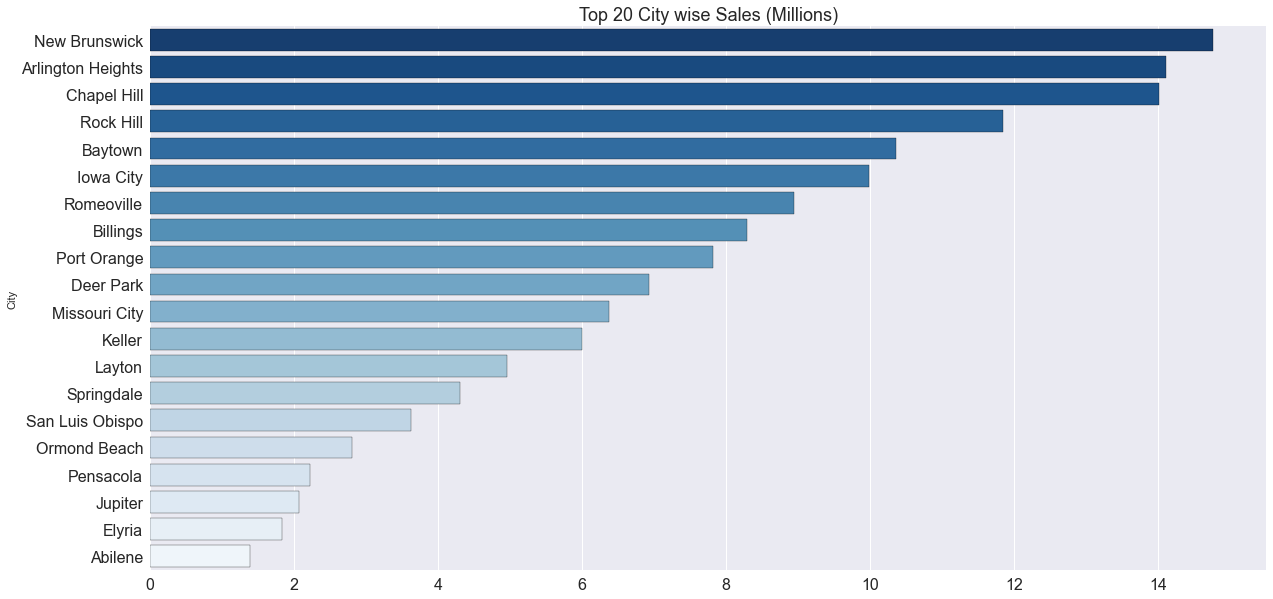

In [82]:
# Top 20 City wise Sales (Millions)
#-------------------------------------------------------------------------------------------
city_group = df.groupby('City').sum('Sales').sort_values('Sales',ascending=False)
#-------------------------------------------------------------------------------------------
fig = plt.figure("Top 20 City wise Sales (Millions)",figsize=(20,10))
#-------------------------------------------------------------------------------------------
sns.barplot(y = city_group['Sales'].index[-20:], 
            x = city_group['Sales'].values[-20:], 
            orient='h',edgecolor='black',
            palette ='Blues_r', ci = None)
#-------------------------------------------------------------------------------------------
plt.title('Top 20 City wise Sales (Millions)',fontsize=18)
plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
#-------------------------------------------------------------------------------------------
plt.show()

### Category wise Sales

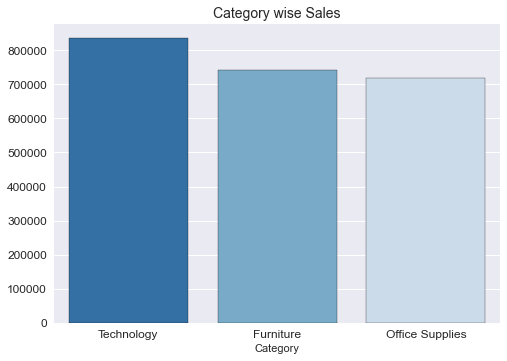

In [91]:
# Category wise Sales
#-------------------------------------------------------------------------------------------
cat_data = df.groupby('Category').sum('Sales').sort_values('Sales',ascending=False)
#-------------------------------------------------------------------------------------------
fig = plt.figure("Category wise Sales")
#-------------------------------------------------------------------------------------------
sns.barplot(x = cat_data['Sales'].index, 
            y = cat_data['Sales'].values, 
            ci = None, palette='Blues_r', edgecolor='black',)
#-------------------------------------------------------------------------------------------
plt.title('Category wise Sales',fontsize=14)
plt.xticks( fontsize=12)
plt.yticks( fontsize=12)
#-------------------------------------------------------------------------------------------
plt.show()

### Category wise Sales

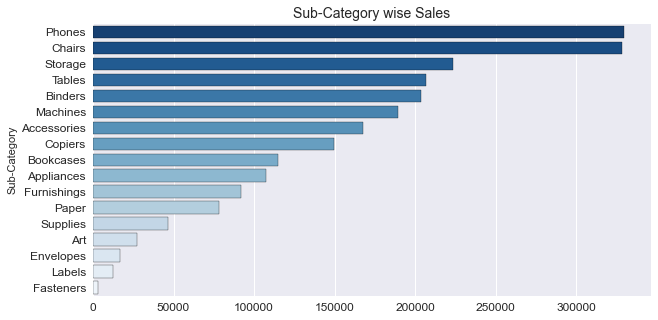

In [78]:
# Category wise Sales
#-------------------------------------------------------------------------------------------
sub_cat_data = df.groupby('Sub-Category').sum('Sales').sort_values('Sales',ascending=False)
#-------------------------------------------------------------------------------------------
fig = plt.figure("Sub-Category wise Sales",figsize=(10,5))
#-------------------------------------------------------------------------------------------
sns.barplot(y = sub_cat_data['Sales'].index, 
            x = sub_cat_data['Sales'].values, 
            orient='h',edgecolor='black',
            palette ='Blues_r', ci = None)
#-------------------------------------------------------------------------------------------
plt.title('Sub-Category wise Sales',fontsize=14)
plt.xticks( fontsize=12)
plt.yticks( fontsize=12)
#-------------------------------------------------------------------------------------------
plt.show()

### Year wise Sales

In [75]:
df['Year'] = df['Order Date'].dt.year

In [14]:
df['Month'] = df['Order Date'].dt.month

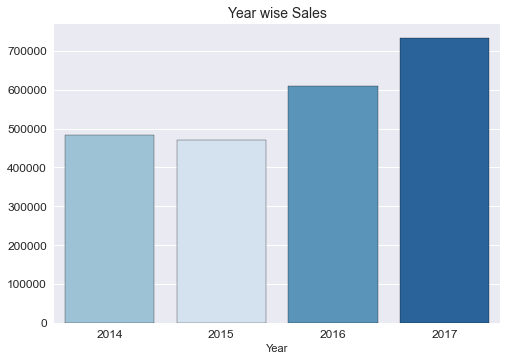

In [94]:
# Year wise Sales
#-------------------------------------------------------------------------------------------
year_group = df.groupby('Year').sum('Sales').sort_index()
#-------------------------------------------------------------------------------------------
fig = plt.figure("Year wise Sales")
#-------------------------------------------------------------------------------------------
a = sns.barplot(x = year_group['Sales'].index, 
                y = year_group['Sales'].values,
                hue=year_group['Sales'].values,
                edgecolor='black', dodge=False,
                palette ='Blues', ci = None)
#------------------------------------------------------------------------------------------
a.legend_.remove()
plt.xticks( fontsize=12)
plt.yticks( fontsize=12)
#-------------------------------------------------------------------------------------------
plt.title('Year wise Sales',fontsize=14)
#-------------------------------------------------------------------------------------------
plt.show()

### Month wise Total Sales 

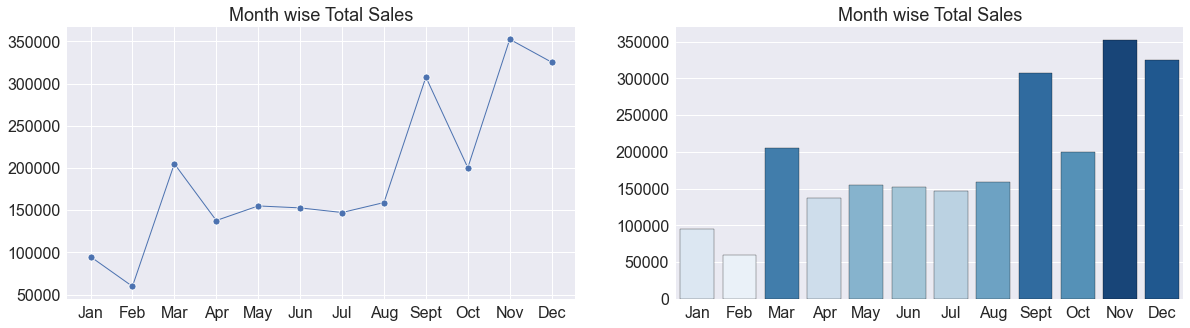

In [130]:
# Month wise Total Sales
#------------------------------------------------------------------------------------------
month_group = df.groupby('Month').sum('Sales').sort_index()
#------------------------------------------------------------------------------------------
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec']
#-------------------------------------------------------------------------------------------
fig = plt.figure("Month wise Total Sales",figsize=(20,5))
#-------------------------------------------------------------------------------------------
plt.subplot(1,2,1)

sns.lineplot(x = months, y = month_group['Sales'].values,
             linewidth=1,marker='o')
#-------------------------------------------------------------------------------------------
plt.title('Month wise Total Sales',fontsize=18)
plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
#-------------------------------------------------------------------------------------------

plt.subplot(1,2,2)
a = sns.barplot(x = months, 
                y = month_group['Sales'].values,
                hue=month_group['Sales'].values, 
                edgecolor = 'black', dodge=False, 
                palette= 'Blues',ci = None)

a.legend_.remove()
plt.title('Month wise Total Sales',fontsize=18)
plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
#-------------------------------------------------------------------------------------------
plt.show()

### Yearly Month wise Sales

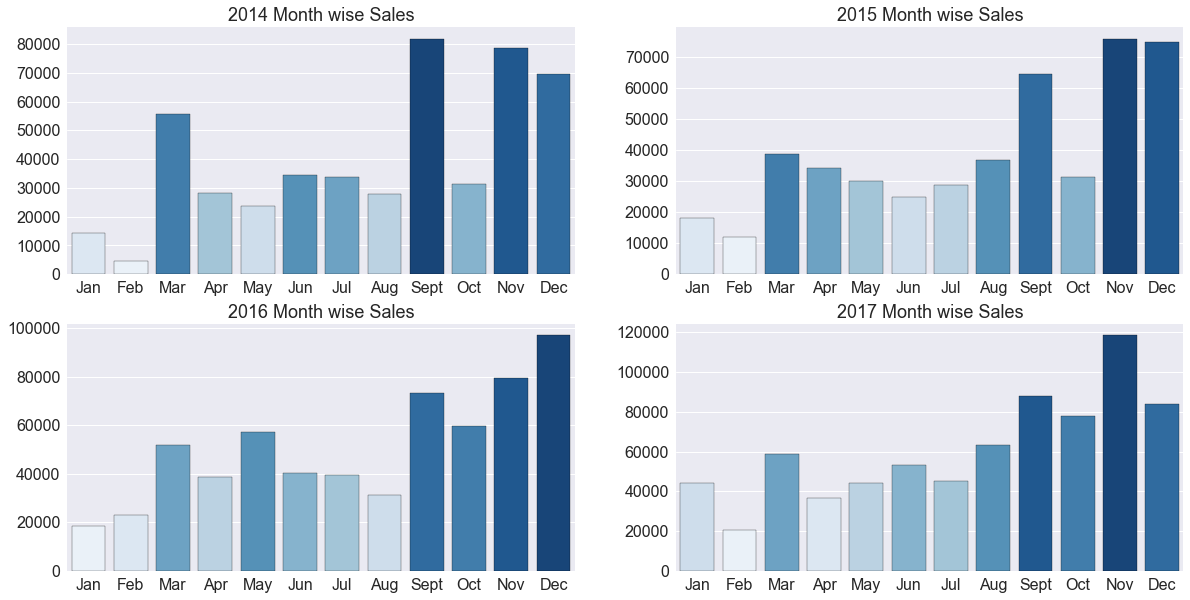

In [96]:
# Yearly Month wise Sales
#---------------------------------------------------------------------------------------
years = sorted(df.Year.unique())
#---------------------------------------------------------------------------------------
fig = plt.figure("Yearly Month wise Sales",figsize=(20,10))
#-------------------------------------------------------------------------------------------
for i,year in enumerate(years):
    #---------------------------------------------------------------------------------------
    year_monthly_group = df[df['Year']==year].groupby('Month').sum('Sales').sort_index()
    #---------------------------------------------------------------------------------------
    plt.subplot(2, 2, i+1)
    #---------------------------------------------------------------------------------------
    a = sns.barplot(x = months, 
                    y = year_monthly_group['Sales'].values,
                    hue = year_monthly_group['Sales'].values,
                    edgecolor = 'black', dodge=False, 
                    palette ='Blues', ci = None)
    #---------------------------------------------------------------------------------------
    a.legend_.remove()
    plt.xticks( fontsize=16)
    plt.yticks( fontsize=16)
    #---------------------------------------------------------------------------------------
    plt.title(str(year)+' Month wise Sales',fontsize=18)
#-------------------------------------------------------------------------------------------
plt.show()

### Yearly Month wise Sales

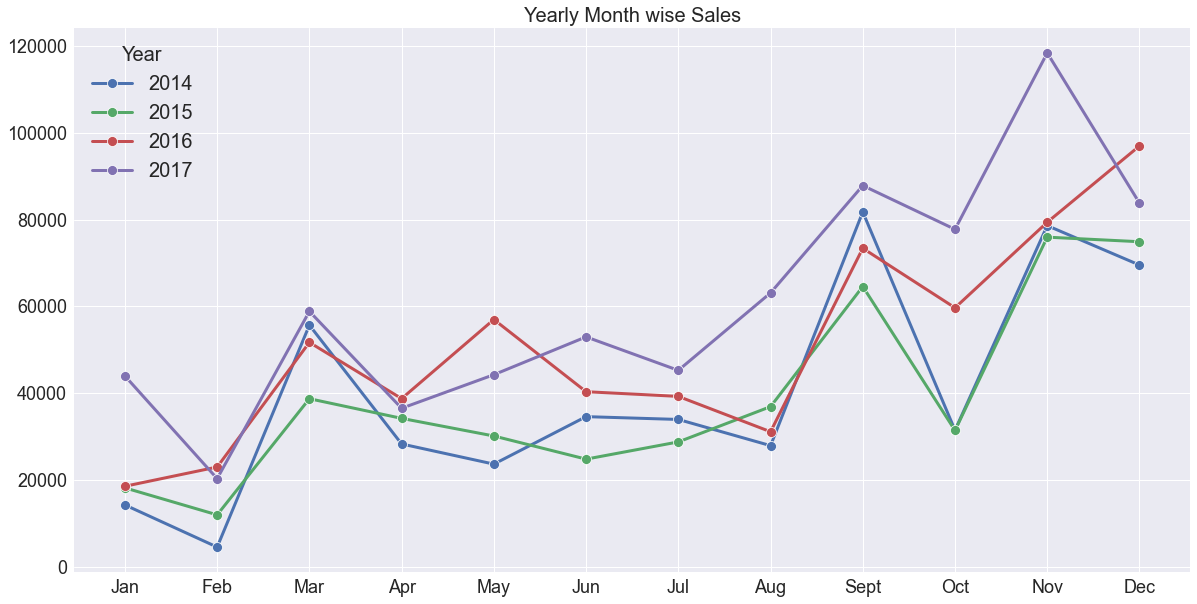

In [102]:
# Yearly Month wise Sales
#---------------------------------------------------------------------------------------
years = sorted(df.Year.unique())
#---------------------------------------------------------------------------------------
fig = plt.figure("Yearly Month wise Sales",figsize=(20,10))
#-------------------------------------------------------------------------------------------
for i,year in enumerate(years):
    #---------------------------------------------------------------------------------------
    year_monthly_group = df[df['Year']==year].groupby('Month').sum('Sales').sort_index()
    #---------------------------------------------------------------------------------------
    sns.lineplot(x = months, 
                 y = year_monthly_group['Sales'].values,
                 marker="o",markersize=10,
                 linewidth=3, ci = None)
    #---------------------------------------------------------------------------------------
plt.legend(labels=years,loc='upper left',title='Year',fontsize='20',title_fontsize="20")
#---------------------------------------------------------------------------------------
plt.title('Yearly Month wise Sales',fontsize=20)
plt.xticks( fontsize=18)
plt.yticks( fontsize=18)
#-------------------------------------------------------------------------------------------
plt.show()

### Yearly Month wise Profit

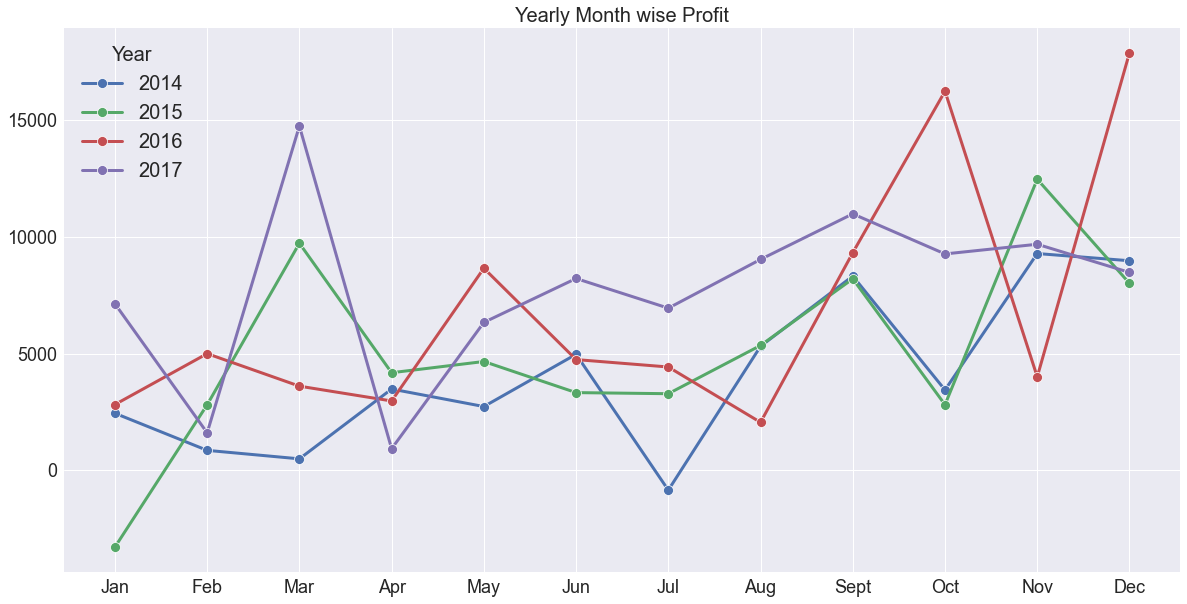

In [103]:
# Yearly Month wise Profit
#---------------------------------------------------------------------------------------
fig = plt.figure("Yearly Month wise Profit",figsize=(20,10))
#-------------------------------------------------------------------------------------------
for i,year in enumerate(years):
    #---------------------------------------------------------------------------------------
    year_monthly_group = df[df['Year']==year].groupby('Month').sum('Profit').sort_index()
    #---------------------------------------------------------------------------------------
    sns.lineplot(x = months, 
                 y = year_monthly_group['Profit'].values,
                 marker="o",markersize=10,
                 linewidth=3, ci = None)
    #---------------------------------------------------------------------------------------
plt.legend(labels=years,loc='upper left',title='Year',fontsize='20',title_fontsize="20")
#---------------------------------------------------------------------------------------
plt.title('Yearly Month wise Profit',fontsize=20)
plt.xticks( fontsize=18)
plt.yticks( fontsize=18)
#-------------------------------------------------------------------------------------------
plt.show()

## Total Sales and its Profit (by Color)

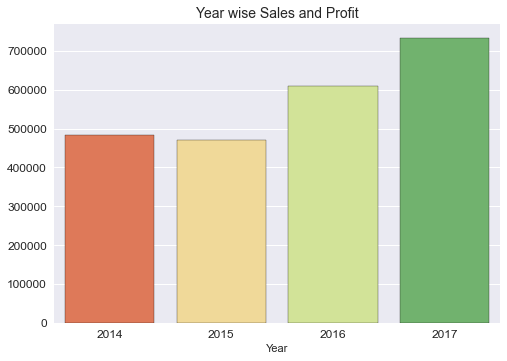

In [60]:
# Year wise Sales and Profit
#-------------------------------------------------------------------------------------------
fig = plt.figure("Year wise Sales and Profit")
#-------------------------------------------------------------------------------------------
a = sns.barplot(x = year_group['Sales'].index, 
                y = year_group['Sales'].values,
                hue=year_group['Profit'].values,
                edgecolor='black', dodge=False,
                palette ='RdYlGn', ci = None)
#------------------------------------------------------------------------------------------
a.legend_.remove()
plt.xticks( fontsize=12)
plt.yticks( fontsize=12)
#-------------------------------------------------------------------------------------------
plt.title('Year wise Sales and Profit',fontsize=14)
#-------------------------------------------------------------------------------------------
plt.show()

### Month wise Total Sales and Profit

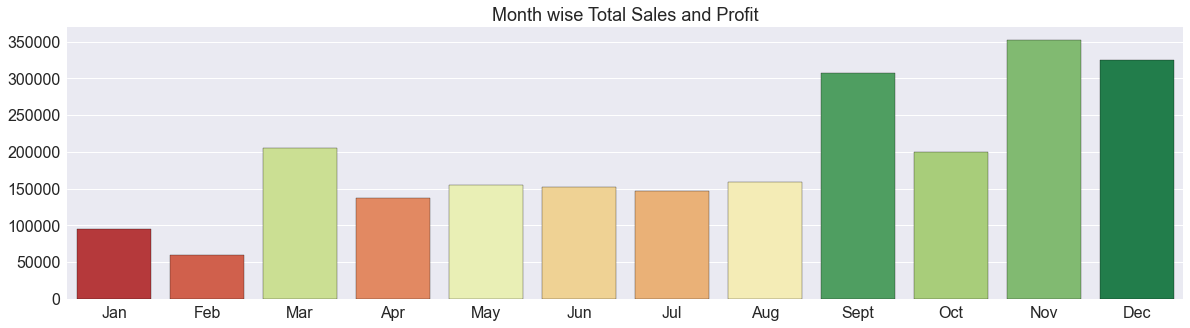

In [104]:
# Month wise Total Sales and Profit
#------------------------------------------------------------------------------------------
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec']
#-------------------------------------------------------------------------------------------
fig = plt.figure("Month wise Total Sales and Profit",figsize=(20,5))
#-------------------------------------------------------------------------------------------
a = sns.barplot(x = months, 
                y = month_group['Sales'].values,
                hue=month_group['Profit'].values, 
                edgecolor = 'black', dodge=False, 
                palette= 'RdYlGn',ci = None)

a.legend_.remove()
plt.title('Month wise Total Sales and Profit',fontsize=18)
plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
#-------------------------------------------------------------------------------------------
plt.show()

### Yearly Month wise Sales and Profit

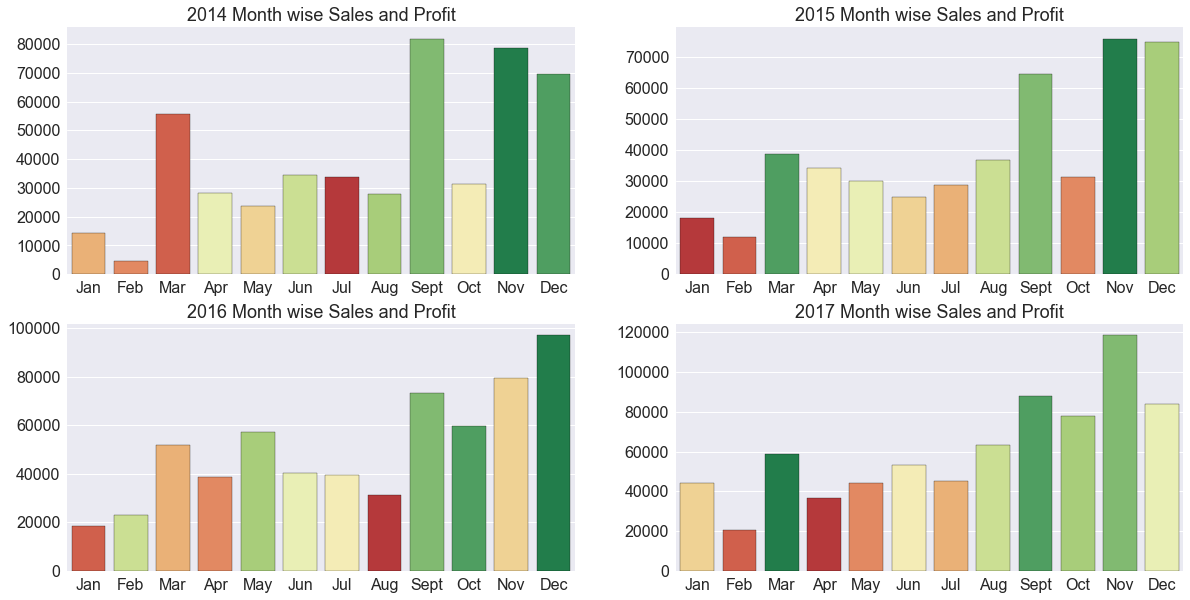

In [99]:
# Yearly Month wise Sales and Profit
#---------------------------------------------------------------------------------------
fig = plt.figure("Yearly Month wise Sales and Profit",figsize=(20,10))
#-------------------------------------------------------------------------------------------
for i,year in enumerate(years):
    #---------------------------------------------------------------------------------------
    year_monthly_group = df[df['Year']==year].groupby('Month').sum('Sales').sort_index()
    #---------------------------------------------------------------------------------------
    plt.subplot(2, 2, i+1)
    #---------------------------------------------------------------------------------------
    a = sns.barplot(x = months, 
                    y = year_monthly_group['Sales'].values,
                    hue = year_monthly_group['Profit'].values,
                    edgecolor = 'black', dodge=False, 
                    palette ='RdYlGn', ci = None)
    #---------------------------------------------------------------------------------------
    a.legend_.remove()
    plt.xticks( fontsize=16)
    plt.yticks( fontsize=16)
    #---------------------------------------------------------------------------------------
    plt.title(str(year)+' Month wise Sales and Profit',fontsize=18)
#-------------------------------------------------------------------------------------------
plt.show()